<a href="https://colab.research.google.com/github/1eetnals/Mary-s-Hospital-AI-center/blob/main/plot_rsfmri_re4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nibabel as nib

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path0 = '/Volumes/HUFS/rs_glymphatic/AD_amy_pos'

In [ ]:
sdir = os.listdir(path0)
print(sdir)

In [ ]:
n=4

In [ ]:
fmri = nib.load(path0+'/'+sdir[n]+'/'+'rsfmri.nii.gz')
mask = nib.load(path0+'/'+sdir[n]+'/'+'re4.nii.gz')


In [ ]:
maskimg = mask.get_fdata()
maskimg.shape

(224, 224, 75)

In [ ]:
fmrimg = fmri.get_fdata()
fmrimg.shape

(224, 224, 75, 150)

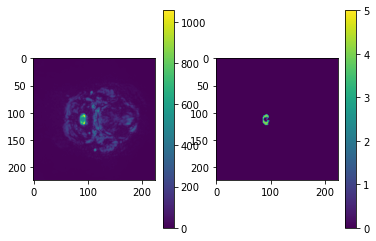

In [ ]:
z=0
plt.subplot(1,2,1)
plt.imshow(fmrimg[:,:,z,0])
plt.colorbar()
plt.subplot(1,2,2)
plt.imshow(maskimg[:,:,z],vmin=0,vmax=5)
plt.colorbar()
plt.show()

In [ ]:
sz = fmrimg.shape

In [ ]:
fmrimg_r = np.reshape(fmrimg,(sz[0]*sz[1]*sz[2],sz[3]))
maskimg_r = np.reshape(maskimg,(sz[0]*sz[1]*sz[2],1))

In [ ]:
roi_ind = np.where(maskimg_r==4)[0]
len(roi_ind)

833

In [ ]:
roi_sig = fmrimg_r[roi_ind,:]
roi_sig.shape

(833, 150)

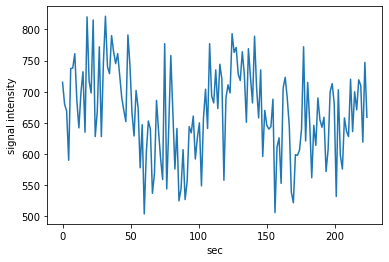

In [ ]:
xx = np.arange(0,1.5*sz[-1],1.5)
plt.plot(xx,roi_sig[0])
plt.xlabel('sec')
plt.ylabel('signal intensity')
plt.show()

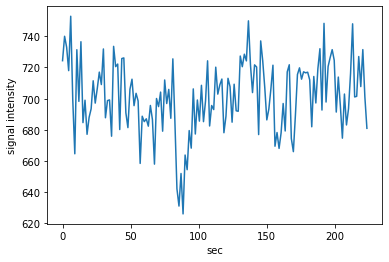

In [ ]:
plt.plot(xx,np.mean(roi_sig,axis=0))
plt.xlabel('sec')
plt.ylabel('signal intensity')
plt.show()